# Math for ML: Linear Algebra

In part 3 of this series on Math for ML I'll introduce the important topic of linear algebra. A basic understanding of linear algebra is absolutely fundamental to machine learning. In some sense ML basically *is* an application of linear algebra. We'll cover vectors, matrices, tensors, and important operations between them.

Let's get started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.math_ml import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams["figure.figsize"] = (4, 3)

## Vectors

### Vector Definition

The most fundamental object of linear algebra is the **vector**. In mathematical terms, a (real-valued) vector is a rank-1 array $\mathbf{x}$ containing $n$ real numbers (called **elements**) $x_0,x_1,x_2,\cdots,x_{n-1}$,
$$\mathbf{x} = (x_0,x_1,x_2,\cdots,x_{n-1}).$$

We typically use the use of the bold-face $\mathbf{x}$ to represent the entire vector symbolically, and we use unbolded italic characters $x_i$ to denote the elements of that vector. This is a common convention. When writing vectors by hand it's common to instead write the vector with an arrow over it instead, like $\vec{x}$.

Note my choice to use 0-indexing. The $n$ elements go from $x_0,x_1,x_2,\cdots,x_{n-1}$. This differs from the usual 1-indexing convention used in math, but agrees with the python indexing convention. I chose it so it's easier to go back and forth between math and code in this book.

**Notation:** Math folks like to call the space in which these vectors live the **vector space**, denoted $\mathbb{R}^n$ for a vector space of size $n$. To say a vector $\mathbf{x}$ is in the vector space we'd write $\mathbf{x} \in \mathbb{R}^n$.

To be valid vectors, they must have well-defined operations of vector addition and scalar multiplication.
- If $\mathbf{x}=(x_0,\cdots,x_{n-1})$ and $\mathbf{y}=(y_0,\cdots,y_{n-1})$ are two vectors in the vector space $\mathbb{R}^n$, then so is their sum defined by
$$\mathbf{x} + \mathbf{y} = (x_0+y_0, x_1+y_1, \cdots, x_{n-1}+y_{n-1}).$$
- If $\mathbf{x}=(x_0,\cdots,x_{n-1})$ is a vector in the vector space $\mathbb{R}^n$ and $c \in \mathbb{R}$ is a scalar, then their product is also a vector in $\mathbb{R}^n$ defined by
$$c\mathbf{x} = (cx_0,cx_1,\cdots,cx_{n-1}).$$

Here's an example where we add to vectors, and scalar multiply another. Things happen exactly as you'd expect.

In [3]:
x = np.array([1, 1, 1, 1, 1])
y = np.array([1, 1, 1, 1, 1])
x + y
x - y

array([2, 2, 2, 2, 2])

array([0, 0, 0, 0, 0])

In [4]:
x = np.array([1, 1, 1, 1, 1])
c = 10
c * x

array([10, 10, 10, 10, 10])

### Visualizing Vectors

Though we obviously can't mentally visualize an arbitrary $n$ dimensional space, in the simple case when vectors only have two elements we can easily visualize a vector as an arrow pointing in the x-y plane.

Below I'll plot the vector $\mathbf{v} = (1, 2)$ using the helper function `plot_vectors`, identifying the components with the axes as $x=1$ and $y=2$. Notice how the arrow begins at the origin and terminates at the point $(1,2)$. The vector *points* in the direction of $(1,2)$.

Feel free to play around with different vectors and plot them. Just make sure they're 2D. Note you may need to adjust the scales of the plot for some choices of `v`, which you can do with the `xlim` and `ylim` keywords.

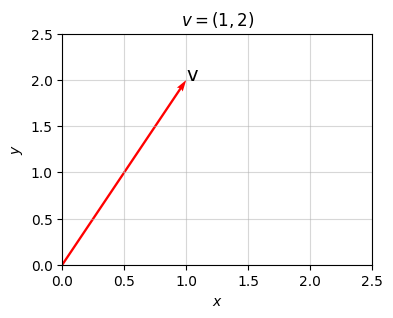

In [5]:
v = np.array([1, 2])
plot_vectors(v, xlim=(0, 2.5), ylim=(0, 2.5), title=f'$v={v[0],v[1]}$')

What about $n$ dimensions? Perhaps the best thing to do there is to just imagine you have an arrow just like above, but instead of pointing in a 2D plane, it's pointing in an $n$ dimensional space. For example, you could imagine an arrow pointing in 3D space just fine, right?

We can also visualize what the operations of vector addition and scalar multiplication look like in this simple case of 2D vectors. For vector addition, imagine you have two vectors $\mathbf{v}$ and $\mathbf{w}$. Plot them just like above, but imagine the vector $\mathbf{w}$ starts at the *head* of $\mathbf{v}$ instead of at the origin. Now, draw a vector from the origin to the head of $\mathbf{w}$. *That* vector will then be the sum of the two, $\mathbf{v}+\mathbf{w}$.

Here's an example. I'll use a helper function to plot the sum of two vectors $\mathbf{v}=(1,1)$ and $\mathbf{w}=(1,3)$. Their sum should be the vector $\mathbf{v}+\mathbf{w}=(2,4)$, which should exactly touch the tail of the two vectors stacked on top of each other. Again, feel free to play around with this function for different choices of $\mathbf{v}$ and $\mathbf{w}$ to get a sense for what's going on.

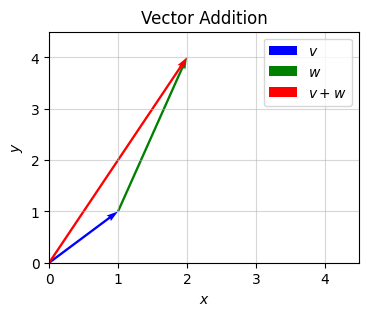

In [6]:
v = np.array([1, 1])
w = np.array([1, 3])
plot_vector_add(v, w, xlim=(0, 4.5), ylim=(0, 4.5))

To visualize scalar multiplication we can just plot a vector along with its scaled vector to get an idea what's going on. Let's do that below for a vector $\mathbf{v}=(1,1)$ with a scalar $c=2$. The original vector is the black arrow and the scaled one is the orange one. Notice that what's going on is the vector just gets *scaled* in length by the factor of $c=2$. That's why a scalar is called a scalar. It scales the length of a vector!

I'll also plot the same vector scaled by $c=-1$ to show what scaling by a negative number does. It just flips the vector in the opposite direction. Again, feel free to play with this function by using different choices for `c`. If you don't want to plot the negative scaling, set `include_neg=False`.

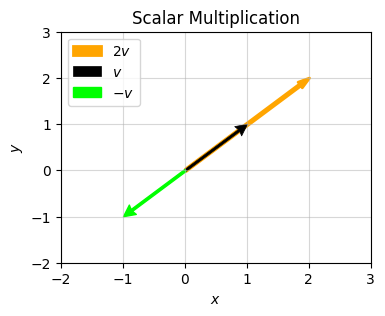

In [7]:
v = np.array([1, 1])
c = 2
plot_scalar_mult(v, c, xlim=(-2, 3), ylim=(-2, 3), include_neg=True)

### Dot Products

Another fundamental operation we can do with vectors is take their **dot product**, also called the **inner product**. The dot product is a way of taking two *vectors* and getting a *scalar* out of them. Why would we want to do this? It turns out that the dot product provides information about *both* the length (or magnitude) of the vector and its angle (or direction). In essence, the dot product captures the *geometry* of vectors.

The dot product between two vectors can be defined as the sum of their element-wise multiplication. That is, if
$\mathbf{x}=x_0,x_1,\cdots,x_{n-1}$ and $\mathbf{y}=y_0,y_1,\cdots,y_{n-1}$ are two vectors, then their dot product $\mathbf{x} \cdot \mathbf{y}$ (pronounced "x dot y") is given by
$$\mathbf{x} \cdot \mathbf{y} = \sum_{i=0}^{n-1} x_i y_i = x_0 y_0 + x_1 y_1 + \cdots + x_{n-1} y_{n-1}.$$

**Notation:** Note the appearance of the capital sigma symbol $\sum_{i=0}^{n-1}$. This means $\text{"sum over each integer } i \text{ from } 0 \text{ to } n-1 \text{ of each product } x_i y_i \text{"}$. It's just a short-hand way of writing out the full sum $x_0 y_0 + \cdots + x_{n-1} y_{n-1}$. The integer $i$ is called a *dummy index*. It can be called whatever we like, so long as it sums over the same numbers. We'll use this summation notation a lot in future lessons. It's nothing to worry about. Just a way to write that we're summing up some numbers. If you like, think of it as the math way to write `np.sum`.

Let's do an example of how to calculate the dot product. Consider two vectors $\mathbf{x}=(2, 0.5)$ and $\mathbf{y}=(1, 3)$.

We can calculate their dot product a few different ways. 
- Element-wise multiply the vectors together with `x * y`. This gives a new vector $(2\cdot 1,0.5\cdot 3)$, which we can then *sum* to get the dot product `np.sum(x * y)`.
- Use the function `np.dot(x, y)`, which calculates the dot product directly.
- Use the `@` symbol and the transpose method `T`, which I'll define shortly when we get to matrix multiplication: `x.T @ y`.

Observe the output to each of these 3 methods is exactly the same, as it should be: $\mathbf{x} \cdot \mathbf{y} = 3.5$.

In [8]:
x = np.array([2, 0.5])
y = np.array([1, 3])

In [9]:
np.sum(x * y)
np.dot(x, y)
x.T @ y

3.5

3.5

3.5

### Norms and Cosine Similarity

Great, so we just introduced 3 ways to calculate the number 3.5. What of it? It turns out this number says something about the *angle* between these two vectors.

Before discussing how to calculate the angle between two vectors, let's discuss the simpler idea of how to calculate the *length* of a vector. It's just the square root of the vector's dot product with itself. For technical reasons, this is usually called the **2-norm** in machine learning instead of the length, and written

$$||\mathbf{x}||_2 = \sqrt{\mathbf{x} \cdot \mathbf{x}} = \sqrt{\sum_{i=0}^{n-1} x_i^2}.$$

The 2-norm corresponds to the Euclidean length you learn about in geometry, which is essentially just the Pythagorean Theorem. If $\mathbf{v}=(x, y)$ for example, then its length would be the 2-norm 

$$||\mathbf{v}||_2 = \sqrt{\mathbf{v} \cdot \mathbf{v}} = \sqrt{x^2+y^2}.$$

That is, $||\mathbf{v}||_2$ is just the hypotenuse of a right triangle with base $x$ and height $y$.

**Aside:** There are other ways of defining norms as well that don't correspond to length. Two notable examples are
- The **1-norm** $$||\mathbf{x}||_1 = \sum_{i=0}^{n-1} |x_i|.$$
- The **infinity-norm** $$||\mathbf{x}||_\infty = \max (|x_0|,|x_2|,\cdots,|x_{n-1}|).$$

Both of these norms are sometimes used in machine learning since they have subtly different properties than the 2-norm.

Here's a calculation of the 2-norm of the same two vectors $\mathbf{x}, \mathbf{y}$ defined above. I'll define a function `two_norm`, which will calculate the dot product of a vector with itself using `np.dot`, then take its square root with `np.sqrt`, returning the result.

In [10]:
def two_norm(x):
    return np.sqrt(np.dot(x, x))

two_norm(x)
two_norm(y)

2.0615528128088303

3.1622776601683795

Observe that the length of $\mathbf{w}$ is larger than the length of $\mathbf{v}$. We can see this by plotting these two vectors next to each other.

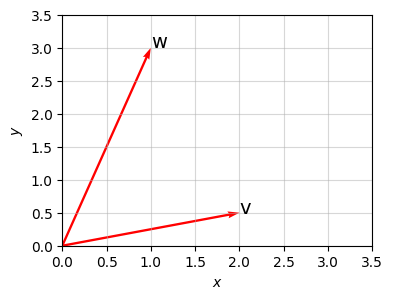

In [11]:
plot_vectors([x, y], xlim=(0, 3.5), ylim=(0, 3.5), labels=['v', 'w'])

In this plot we can also estimate the angle between these two vectors, call it $\theta$. It looks like $\theta \approx 45^{\circ}$ or so. To calculate $\theta$ exactly we can use the following formula,
$$\cos\theta = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}||_2 ||\mathbf{y}||_2}.$$

That is, the cosine of the angle between two vectors is their dot product divided by both their lengths. 

**Aside:** If you want a proof of this formula, convince yourself that the following formula is true: $||\textbf{x}||_2^2 + ||\textbf{y}||_2^2 = (\textbf{x} \cdot \textbf{y})^2$.
Then, use the Pythagorean Theorem and the the trig definition of $\cos\theta$ on a right triangle with side lengths $||\textbf{x}||_2$ and $||\textbf{y}||_2$.

Using this formula we can identify two special cases in particular. 
1. If $\theta = 0^\circ$, then $\cos\theta = 1$. This means $\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}||_2 ||\mathbf{y}||_2$. The two vectors $\mathbf{x}$ and $\mathbf{y}$ are *parallel* to each other.
2. If $\theta = 90^\circ$, then $\cos\theta = 0$. This means $\mathbf{x} \cdot \mathbf{y} = 0$. The two vectors are *perpendicular* to each other. In this case they're said to be **orthogonal**.

In machine learning this formula for $\cos\theta$ is called the **cosine similarity** between two vectors. It gives a length-invariant measure of how much two vectors "agree" with each other. We'll see it show up again when we want a length-invariant way to measure how similar two samples of data are to each other.

Let's calculate the cosine similarity for our two vectors. I'll define a function `cosine_similarity` to do this. It seems like the two vectors above should agree reasonably, but not perfectly. If their angle is about 45&deg;, then their cosine similarity should be something like 0.5, which is about what we get.

In [12]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (two_norm(x) * two_norm(y))

cosine_similarity(x, y)

0.5368754921931592

## Matrices

### Matrix Definition

The next step up from rank-1 arrays are the rank-2 arrays, called matrices. A **matrix** is a rank-2 array of real numbers. That is, a matrix $\mathbf{A}$ contains $m$ rows and $n$ columns of real numbers $A_{i,j}$. Note there are then $n\cdot m$ total elements in $\mathbf{A}$. In mathematical notation we'd express $\mathbf{A}$ in a grid like this,
$$
\mathbf{A} = 
\begin{pmatrix}
    A_{0,0} & A_{0,1} & \dots & A_{0,n-1} \\
    A_{1,0} & A_{1,1} & \dots & A_{1,n-1} \\
    \vdots & \vdots & \ddots & \vdots \\
    A_{m-1,0} & A_{m-1,1} & \dots & A_{m-1,n-1}
\end{pmatrix}.
$$

I'll sometimes write the elements of an array using subscripts like $A_{i,j}$ as above, and sometimes using the usual array notation $A[i,j]$. The choice will depend on the situation. I'm using the subscript convention here because it's most common when covering math topics like linear algebra.

**Notation:** Just as we'd might write $\mathbf{x} \in \mathbb{R}^n$ to say a vector is an array of $n$ real numbers, we'd similarly write $\mathbf{A} \in \mathbb{R}^{m \times n}$ to say that a matrix is a real-valued array of shape $(m,n)$. The notation $m \times n$ means the same thing as $(m,n)$ in specifying the shape of the matrix. 

When $m=n$ we say the matrix is a **square matrix**. If it's not square it's sometimes called a rectangular matrix.

Just like with vectors, we can always add matrices and multiply them by scalars and they'll still be valid matrices.

A simple example of a matrix might be the $3 \times 3$ matrix
$$
\mathbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}.
$$

In [13]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Column and Row Vectors

Vectors can also be represented as matrices. We can think of a size $n$ vector as a matrix with only a column, called a column vector. A **column vector** $\mathbf{x}$ is a matrix of shape $(n,1)$ written as,
$$
\mathbf{x} = 
\begin{pmatrix}
    x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{n-1} \\
\end{pmatrix}.
$$

We can also think of a size $n$ vector as a matrix with only a single row, called a row vector. A **row vector** $\mathbf{x}^\top$ is a matrix of shape $(1,n)$ written as (note the lack of commas between elements),

$$
\mathbf{x}^\top = 
\begin{pmatrix}
    x_0 & x_1 & x_2 & \cdots & x_{n-1} \\
\end{pmatrix}.
$$

By convention, column vectors are treated as the "standard" way to deal with vectors. For this reason they're usually just written $\mathbf{x}$ without any special symbols. Row vectors are relegated to second-class status. They're usually represented by $\mathbf{x}^\top$ to indicate they're just "transposed" column vectors. The $\top$ symbol means "transpose". I'll define the transpose operation more generally in a bit.

Despite what look like three different definitions, a vector can be equally treated as a regular "flat" vector, a row vector, or a column vector depending on what we want to do with it. No matter how we represent the vector it's still the exact same object with elements $(x_0,x_1,\cdots,x_{n-1})$. The elements don't change. Just the shape.

In numpy we can easily go back and forth between flat vectors, row vectors, and column vectors using the `reshape` and `flatten` methods.

We can get a column vector out of `x` a couple different ways:
- Define the vector from scratch, e.g. `np.array([[1], [2], [3], [4], [5]])`. Each element needs to go in its own list.
- Use `reshape`, passing in a shape of `(-1, 1)`: `x.reshape(-1, 1)`. The `-1` is a shorthand for "however many elements need to go here to reshape this object". It keeps you from having to pass a number in explicitly.
- Use the numpy trick of adding a `None` column, which creates a dimension of size 1 in that slot: `x[:, None]`.

Row vectors can be created similarly. For example, using `x.reshape(1, -1)` or `x[None, :]`. We can also get a row vector by just transposing a column vector, e.g. using `x.reshape(-1, 1).T`.

If we have a row or column vector and want to go *back* to a flat vector we can just call `x.flatten()`, which collapses all elements into a single dimension.

Here's an example. I'll define a flat vector `x` of size 5, and show a couple ways to create column and row vectors out of `x`, as well as how to go backwards to `x` again.

In [14]:
x = np.array([1, 2, 3, 4, 5])
x.shape
x

(5,)

array([1, 2, 3, 4, 5])

In [15]:
x_col = np.array([[1], [2], [3], [4], [5]]) # define a column vector from scratch
x_col = x.reshape(-1, 1) # define a column vector using reshape
x_col = x[:, None] # define a column vector by adding a None column
x_col.shape 
x_col

(5, 1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [16]:
x_row = np.array([[1, 2, 3, 4, 5]]) # define a row xector from scratch
x_row = x.reshape(1, -1) # define a row xector using reshape
x_row = x_col.T # define a row xector by transposing a column xector
x_row = x[None, :] # define a row xector by adding a None row
x_row
x_row.shape

array([[1, 2, 3, 4, 5]])

(1, 5)

In [17]:
x_row.flatten() # flatten a row vector into a flat vector
x_col.flatten() # flatten a column vector into a flat vector

array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

### Matrix Multiplication

On top of the usual element-wise operations that any array obeys, matrices also have *another* special kind of multiplication. You probably have seen this version of matrix multiplication before in school, taught as the "standard" way to multiply matrices. It's no exaggeration to say that matrix multiplication is the single most important operation in machine learning. It's the bread and butter operation of the most important machine learning algorithms.

Let $\mathbf{A}$ and $\mathbf{B}$ be two matrices, where $\mathbf{A}$ has shape $(m,n)$ and $\mathbf{B}$ has shape $(n,p)$. Then we can define a new operation called **matrix multiplication** on these two matrices to get a new matrix $\mathbf{C}$ of shape $(m,p)$ whose elements are

$$C_{i,k} = \sum_{j=1}^n A_{i,j}B_{j,k} = A_{i,0}B_{0,k} + A_{i,1}B_{1,k} + \cdots + A_{i,n-1}B_{n-1,k}.$$

In mathematical language we usually just write matrix multiplication symbolically as $\mathbf{C} = \mathbf{A}\mathbf{B}$ without any special symbols.

All of this may be a little hard to understand at first, so let's do an example. We'll multiply the two matrices

$$
\mathbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}, \qquad
\mathbf{B} = 
\begin{pmatrix}
    6 & 5 \\
    4 & 3 \\
    2 & 1 \\
\end{pmatrix}.
$$

Since $\mathbf{A}$ has shape $(3,3)$ and $\mathbf{B}$ has shape $(3,2)$, then $\mathbf{C} = \mathbf{A}\mathbf{B}$ should have shape $(3,2)$.

The trick to do this easily by hand is to notice that each element $C_{i,k}$ is just the dot product of the $i$<sup>th</sup> *row* of $\mathbf{A}$ with the $k$<sup>th</sup> *column* of $\mathbf{B}$,

$$
\mathbf{C} = 
\begin{pmatrix}
    A_{0,:} \bullet B_{:,0} & A_{0,:} \bullet B_{:,1} \\
    A_{1,:} \bullet B_{:,0} & A_{1,:} \bullet B_{:,1} \\
    A_{2,:} \bullet B_{:,0} & A_{2,:} \bullet B_{:,1} \\
\end{pmatrix} = 
\begin{pmatrix}
   1\cdot 6+2\cdot 4+3\cdot 2 & 1\cdot 5+2\cdot 3+3\cdot 1 \\
   4\cdot 6+5\cdot 4+6\cdot 2 & 4\cdot 5+5\cdot 3+6\cdot 1 \\
   7\cdot 6+8\cdot 4+9\cdot 2 & 7\cdot 5+8\cdot 3+9\cdot 1 \\
\end{pmatrix} = 
\begin{pmatrix}
   20 & 14 \\
   56 & 41 \\
   92 & 68 \\
\end{pmatrix}.
$$

**Aside:** If you're having a hard time understanding what matrix multiplication is doing, [here](http://matrixmultiplication.xyz/) is an online interactive tool you may find helpful.

Of course, why multiply matrices by hand when can write code to do it for us? I'll write a function `matmul` that takes in two matrices `A` and `B` and multiplies them if they're compatible. This can be done by looping over all the rows of `A` and all the columns of `B`. At each step of the loop we're calculating some <br> `C[i, j]`, which as we showed above is just the dot product of the rows `A[i, :]` with the columns `B[:, j]`. That's it.

In [18]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); A
B = np.array([[6, 5], [4, 3], [2, 1]]); B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[6, 5],
       [4, 3],
       [2, 1]])

In [19]:
def matmul(A, B):
    assert A.shape[1] == B.shape[0], '# columns of A must equal # rows of B'
    m, n, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            C[i, j] = np.dot(A[i, :], B[:, j])
    return C.astype(A.dtype)

C = matmul(A, B); C

array([[20, 14],
       [56, 41],
       [92, 68]])

To matrix multiply in numpy we have at least three ways we can do it:
- Use the `np.matmul` function: `C = np.matmul(A, B)`,
- Use the `np.dot` function: `C = np.dot(A, B)`,
- Use the `@` operator: `C = A @ B`.
I'll use the `@` operator approach since it's the easiest to read and write. It looks kind of like a multiplication symbol.

In [20]:
C = A @ B; C

array([[20, 14],
       [56, 41],
       [92, 68]])

It's important that the number of *columns* of $\mathbf{A}$ equal the number of *rows* of $\mathbf{B}$. If not, matrix multiplication between the two is not defined.

Also, unlike ordinary multiplication or element-wise multiplication, $\mathbf{A}\mathbf{B} \neq \mathbf{B} \mathbf{A}$. Another way of saying this is that matrix multiplication does not *commute*.

Why is matrix multiplication so important in machine learning? Perhaps one reason is that it turns out to be the equivalent of composing two functions. The linear algebra equivalent of the function composition $y=f(g(x))$ is the matrix multiplication $\mathbf{C}=\mathbf{A}\mathbf{B}$. Function composition is at the heart of the definition of neural networks. Neural networks are basically just chains of matrix multiplications and non-linear functions.

### Matrix Multiplication vs Element-Wise Multiplication

It's important to mind the difference between matrix multiplication and *element-wise multiplication of matrices*. They do two different things. To distinguish the two, it's sometimes common to denote the element-wise multiplication of matrices with the symbol $\mathbf{A} \odot \mathbf{B}$ and call it the **Hadamard product**.

The elements of the element-wise product is given by $A_{i,j} \cdot B_{i,j}$, and *not* $\sum_j A_{i,j}B_{j,k}$. This means that in general

$$\mathbf{A} \odot \mathbf{B} \neq \mathbf{A} \mathbf{B}.$$

Element-wise multiplication is only defined when the shapes of $\mathbf{A}$ and $\mathbf{B}$ are *equal* (or can be broadcast to be equal).

Of course, in python we instead use `A * B` for element-wise multiplication and `A @ B` for matrix multiplication. Unfortunately code notation and math notation can't always agree.

To make it clear the two kinds of multiplication aren't the same thing here's an example.

In [21]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
A * B
A @ B

array([[1, 0],
       [0, 4]])

array([[1, 2],
       [3, 4]])

### Transposition

An important operation that we can do to a matrix is take its transpose. The **transpose** of a matrix is just the same matrix, but with the row and column indexes swapped. Equivalently, it's the matrix whose elements are flipped about its diagonal. More formally, if a matrix $\textbf{A}$ has shape $(m,n)$ and its elements are written $A_{i,j}$, then the transpose of $\textbf{A}$ is defined as a new matrix $\textbf{A}^\top$ of shape $(n,m)$ whose elements are given by

$$A^{\top}_{i,j}=A_{j,i}.$$

The matrix $\textbf{A}^\top$ is usually pronounced "A transpose".

In our running example, we'd have
$$
\textbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix} \quad \Longrightarrow \quad
\textbf{A}^\top = 
\begin{pmatrix}
    1 & 4 & 7 \\
    2 & 5 & 8 \\
    3 & 6 & 9 \\
\end{pmatrix}.
$$

You can easily convince yourself that transposing a matrix twice gives the same matrix back: $(\textbf{A}^\top)^\top=\textbf{A}$.

Transposition reverses the order of matrix multiplication. If $\mathbf{C} = \mathbf{A}\mathbf{B}$, then

$$\mathbf{C}^\top = \big(\mathbf{A}\mathbf{B}\big)^\top = \mathbf{B}^\top\mathbf{A}^\top.$$

Why would we care about the transpose? It's in some sense equivalent, or *dual* to $\textbf{A}$. It provides the same information as $\textbf{A}$ in every meaningful way except its shape is flipped. We'll see several examples below where the transpose shows up.

Here's an example of the transpose operation in numpy on a $3 \times 2$ matrix. The output should be a $2 \times 3$ matrix with rows and columns swapped. To transpose a matrix `A` we can use `A.T`, or alternatively `np.transpose`.

In [22]:
A = np.array([[1, 2], [3, 4], [5, 6]]); A
A_transpose = A.T; A_transpose
A.shape, A_transpose.shape

array([[1, 2],
       [3, 4],
       [5, 6]])

array([[1, 3, 5],
       [2, 4, 6]])

((3, 2), (2, 3))

The transpose operation gives us yet another way to express the dot product between two vectors $\mathbf{x}$ and $\mathbf{y}$. Treating them as column vectors, if we transpose one of them we get a row vector. If we put the row vector on the left and matrix multiply it with the column vector on the right we just get

$$\mathbf{x}^\top \mathbf{y} = \mathbf{y}^\top \mathbf{x} = \sum_{i=1}^n x_i y_i = \mathbf{x} \cdot \mathbf{y}.$$

This means we can also write the dot product as $\mathbf{x}^\top \mathbf{y}$. You'll often see this notation in the machine learning literature, more than the $\mathbf{x} \cdot \mathbf{y}$ notation in fact.

It's also fair to ask what happens if we put the row vector on the right instead and write $\mathbf{x} \mathbf{y}^\top$. It's still a valid operation. But instead of a scalar we get an $n \times n$ matrix whose elements are just $A_{i,j} = x_i y_j$. This is called the **outer product** or **tensor product**. The outer product is an example of a "rank-1" matrix. These matrices by and large can't be inverted.

Here's an example, where I'll calculate the dot product for a simple vector of size $4$ using matrix multiplication. I'll also show the outer product. Notice the outer product here is a $4 \times 4$ matrix.

In [23]:
x = np.array([1, 1, 1, 1]).reshape(-1, 1)
dot = x.T @ x
dot.item()

4

In [24]:
outer = x @ x.T
outer

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

### Inversion

An important matrix to be aware of is the **identity matrix**. It's a matrix whose values are 1 on the diagonal and 0 everywhere else. It's usually denoted $\mathbf{I}$ or $\mathbf{1}$. 

The identity matrix is important because it functions like a 1 for matrices. Just like multiplying any number $x \cdot 1$ gives back $x$, when the identity matrix is matrix multiplied with any other matrix $\mathbf{A}$ it gives that matrix back, $\mathbf{A} = \mathbf{I}\mathbf{A} = \mathbf{A}\mathbf{I}$.

To create a identity matrix in numpy use `np.eye`.

In [25]:
I = np.eye(3); I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The identity matrix features most importantly when discussing inverses. Suppose we have a square matrix $\mathbf{A}$. We can ask, is there some other matrix $\mathbf{B}$ that "undoes" $\mathbf{A}$ in the sense that $\mathbf{A}\mathbf{B} = \mathbf{I}$? When there is such a matrix, we write it as $\mathbf{A}^{-1}$ and call it the **inverse** of $\mathbf{A}$,

$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}\mathbf{A}^{-1} = \mathbf{I}.$$

Inverses need not always exist, but they do for *almost all* square matrices in some sense. If you want to calculate the inverse of a matrix numerically you can use the command `np.linalg.inv`. Here's an example. Notice the roundoff errors in the off-diagonals, which aren't exactly zero like they should be.

In [26]:
A = np.array([[1, 2], [3, 4]]); A
A_inv = np.linalg.inv(A); A_inv
A @ A_inv

array([[1, 2],
       [3, 4]])

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In practice you usually don't want to calculate inverses numerically like this, since the calculations are heavily prone to roundoff errors, especially if the matrix is ill-conditioned.

**Aside:** What if $\mathbf{A}$ is not square? Can we get an inverse out of it? In fact we can, usually. The generalization of the matrix inverse to non-square matrices is called the [pseudoinverse](https://en.wikipedia.org/wiki/Generalized_inverse), sometimes denoted by $\mathbf{A}^+$. Pseudoinverses can sometimes be useful for certain machine learning algorithms like least squares regression, which involves inverting non-square matrices of data. In numpy you can get the pseudoinverse with the function `np.linalg.pinv`.

### Matrix-Vector Multiplication

Just like vectors, matrices can of course be thought of as arrays that store data. Things that can be operated on. But on top of that idea, matrices are also useful as objects that *operate* on vectors. A matrix can map vectors to other vectors via matrix-vector multiplication. This is called a linear map.

Let's define matrix-vector multiplication simply as the *matrix multiplication* of a matrix with a column (or row) vector. By the rules of matrix multiplication, the output will always be another column (or row) vector.

For a matrix $\mathbf{A}$ of shape $(m,n)$ and a column vector $\mathbf{x}$ of shape $(n,1)$, their matrix-vector product is a new vector $\mathbf{y}$ of shape $(m,1)$ given by the matrix multiplication 
$$\mathbf{y} = \mathbf{A}\mathbf{x}.$$

We can also define matrix multiplication using row vectors in a similar way, except they multiply in the opposite order. If $\mathbf{\tilde x}^\top$ is a row vector of shape $(1,m)$, then when multiplied on the left by $\mathbf{A}$ we get a new row vector $\mathbf{\tilde y}^\top$,
$$\mathbf{\tilde y}^\top = \mathbf{\tilde x}^\top \mathbf{A}.$$

In general the two vectors $\mathbf{y}$ and $\mathbf{\tilde y}$ won't be the same unless the matrix $\mathbf{A}$ is both square and symmetric, i.e. $\mathbf{A}=\mathbf{A}^\top$.

Here's an example. Take

$$
\mathbf{A} = 
\begin{pmatrix}
   8 & 4 \\
   5 & 10 \\
   6 & 3 \\
\end{pmatrix}.
$$

First I'll right-multiply a column vector $\mathbf{x}=\binom{1}{1}$ and then left-multiply a row vector $\mathbf{\tilde x}^\top=(-1 \ 0 \ 1)$.

In [27]:
A = np.array([[8, 4], [5, 10], [6, 3]])
x_right = np.array([1, 1]).reshape(-1, 1)
x_left_t = np.array([-1, 0, 1]).reshape(1, -1)

In [28]:
y_right = A @ x_right
y_right.shape
y_right

(3, 1)

array([[12],
       [15],
       [ 9]])

In [29]:
y_left = x_left_t @ A
y_left.shape
y_left

(1, 2)

array([[-2, -1]])

The act of matrix-vector multiplication is also called a **linear map**, since performing the operation $\mathbf{y} = \mathbf{A}\mathbf{x}$ equates to a linear mapping $f(\mathbf{x})=\mathbf{A}\mathbf{x}$.

In the simple case when $\mathbf{x} \in \mathbb{R}^2$, we can try to visualize what linear maps are doing by generating a bunch of different $2 \times 2$ matrices $\mathbf{A}$ and multiplying them with $\mathbf{x}$. We can then plot all these vectors $\mathbf{y}$, which will also be in $\mathbb{R}^2$. Let's pick a vector $\mathbf{x}=(1,1)$ and see what happens when we multiply it with a bunch of random matrices $\mathbf{A}$.

To create a random matrix I'm going to use the function `np.random.rand(2, 2)`, which will create a $2 \times 2$ matrix of values between 0 and 1. I'll do this 5 different times. This will give 5 different random $\mathbf{A}$, which will give 5 different $\mathbf{y}$. Finally, I'll plot them using the same `plot_vectors` utils function from before with some minor styling applied.

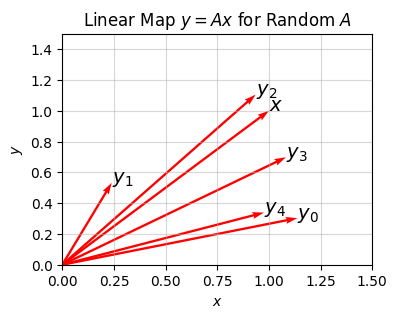

In [30]:
x = np.array([1, 1]).reshape(-1, 1) # create column vector x = [1, 1]
np.random.seed(1) # need this to ensure we get the same vectors every run
ys = []
for i in range(5):
    A = np.random.rand(2, 2) # generate a random (2, 2) matrix A
    y = A @ x # the matrix-vector multiply b = Ax
    ys.append(y)
vectors = [x] + ys # to plot x and all the b vectors
labels = ['$x$'] + [f'$y_{i}$' for i in range(len(ys))] # to plot the labels
plot_vectors(vectors, xlim=(0, 1.5), ylim=(0, 1.5), labels=labels, title='Linear Map $y=Ax$ for Random $A$')

We started with a vector $\mathbf{x}$ and transform it 5 different ways,

$$\mathbf{y}_0 = \mathbf{A}_0\mathbf{x}, \quad \mathbf{y}_1 = \mathbf{A}_1\mathbf{x}, \quad  \mathbf{y}_2 = \mathbf{A}_2\mathbf{x}, \quad  \mathbf{y}_3 = \mathbf{A}_3\mathbf{x}, \quad  \mathbf{y}_4 = \mathbf{A}_4\mathbf{x}.$$

All of these vectors show up in the plot. Notice the linear maps seem to be doing 2 different things at once: rescaling $\mathbf{x}$, and rotating $\mathbf{x}$ in the plane by some angle. This is pretty much all linear maps do. They map vectors to other vectors. The only way to do that is to rescale a vector and rotate it by some angle to get a new vector. 

This is for the simple case when $\mathbf{A}$ is square, so $\mathbf{x}$ and $\mathbf{y}$ are the same size. If they're not the same size, then $\mathbf{x}$ is also going to get mapped to a different dimensional space.

It thus seems like linear maps of the form $\mathbf{y} = \mathbf{A}\mathbf{x}$ are doing three different things at one time:
- Rescaling $\mathbf{x}$ by some scalar.
- Rotating $\mathbf{x}$ by some angle.
- Mapping $\mathbf{x}$ to a new vector space $\mathbb{R}^m$ if $\mathbf{A}$ is not square.

It seems like we should be able to separate out these effects by breaking $\mathbf{A}$ up somehow.

### The Singular Value Decomposition (SVD)

It turns out that we can separate these 3 distinct behaviors out of $\mathbf{A}$ by *factoring* the matrix into a product of three different matrices $\mathbf{U}, \boldsymbol{\Sigma}, \mathbf{V}$,

$$\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top.$$

Each of these three special matrices performs one and only one of the above operations:
- $\mathbf{V}$ rotates $\mathbf{x}$ in its original space $\mathbb{R}^n$.
- $\boldsymbol{\Sigma}$ rescales $\mathbf{x}$ in its original space $\mathbb{R}^n$.
- $\mathbf{U}$ maps $\mathbf{x}$ to a new space $\mathbb{R}^m$ (and rotates it again in that new space).

The matrix $\boldsymbol{\Sigma}$ is called the **singular value matrix**, a special example of a **diagonal matrix**. Diagonal matrices are non-zero only on the main diagonal, and zero everywhere else. All they can do is scale vectors, not rotate them. The values in the diagonal are called **singular values**,

$$\boldsymbol{\Sigma} = \text{diag}(\sigma_0,\cdots,\sigma_{n-1}).$$

Singular values will always be positive or zero. They're usually denoted by $\sigma$.

The matrices $\mathbf{U}$ and $\mathbf{V}$ on the other hand do the opposite. They can only rotate vectors, not rescale them. Matrices like this are called **orthogonal matrices**. Orthogonal matrices are matrices whose inverse is just their transpose, 

$$\mathbf{U}^{-1} = \mathbf{U}^\top, \quad \mathbf{V}^{-1} = \mathbf{V}^\top.$$

It turns out by a major theorem in linear algebra that we can do this kind of factorization for *any* matrix $\mathbf{A}$, square or not. It's called the **Singular Value Decomposition** or **SVD**. 

The SVD shows up most prominently in machine learning under *Principle Components Analysis*, or *PCA*. PCA is essentially nothing more than the use of the SVD of a data matrix to compress the data into a lower-dimensional feature space. More on this in a future lesson.

We can get the SVD of a matrix in numpy by using the function `np.linalg.svd`, which returns a tuple of the three factored matrices $(\mathbf{U}, \boldsymbol{\Sigma}, \mathbf{V}^\top)$. Here's an example. 

**Aside:** Note ``np.linalg.svd`` returns the singular value matrix $\boldsymbol{\Sigma}$ as a diagonal vector instead of the full matrix itself to save space. If we want to reconstruct $\mathbf{A}$ we first need to get $\boldsymbol{\Sigma}$ back into the correct shape to matrix multiply everything. The easiest way to do this is to use the function `diagsvd` from the `scipy.linalg` module. Scipy is just an extension of numpy with a lot more functions for scientific computing.

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6]])
U, Sigma, Vt = np.linalg.svd(A)
U.shape, Sigma.shape, Vt.shape
U, Sigma, Vt

((2, 2), (2,), (3, 3))

(array([[-0.3863177 , -0.92236578],
        [-0.92236578,  0.3863177 ]]),
 array([9.508032  , 0.77286964]),
 array([[-0.42866713, -0.56630692, -0.7039467 ],
        [ 0.80596391,  0.11238241, -0.58119908],
        [ 0.40824829, -0.81649658,  0.40824829]]))

In [32]:
from scipy.linalg import diagsvd
Sigma_reshaped = diagsvd(Sigma,*A.shape)
U @ Sigma_reshaped @ Vt

array([[1., 2., 3.],
       [4., 5., 6.]])

### Eigenvalues and Positive Definiteness [Optional]

We saw that we can use the SVD to factor any matrix $\mathbf{A}$ into a product $\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top$. This is a generalization of a related idea for square, symmetric matrices.

If a matrix $\mathbf{S}$ is square and symmetric, i.e. $\mathbf{S} = \mathbf{S}^{\top}$, we can do another factorization that's closely related to the SVD, called the **Spectral Decomposition**,

$$\mathbf{S} = \mathbf{X} \boldsymbol{\Lambda} \mathbf{X}^\top.$$

Here $\mathbf{X}$ is also an orthogonal matrix, just like $\mathbf{U}$ and $\mathbf{V}$ are in the SVD. The main difference is that we only need a single orthogonal matrix $\mathbf{X}$ here, not two different ones $\mathbf{U}$ and $\mathbf{V}$. This matrix is called the **eigenvector matrix** of $\mathbf{S}$.

For us, the eigenvector matrix is less important than $\boldsymbol{\Lambda}$. This matrix is called the **eigenvalue matrix**. Like the singular value matrix $\boldsymbol{\Sigma}$, the eigenvalue matrix is diagonal. The diagonal entries are called the **eigenvalues** of $\mathbf{S}$,

$$\boldsymbol{\Lambda} = \text{diag}(\lambda_0,\cdots,\lambda_{n-1}).$$

The eigenvalues of a symmetric matrix, usually denoted $\lambda$, will always be real numbers. Unlike singular values, eigenvalues can be positive, negative, or zero.

**Aside:** The eigenvectors of a symmetric matrix $\mathbf{S}$ are closely related to the singular values of an arbitrary matrix $\mathbf{A}$. In fact, the singular values of $\mathbf{A}$ are the square roots of the eigenvalues of the symmetric matrix $\mathbf{S}=\mathbf{A}^\top \mathbf{A}$.

In numpy, we can easily calculate the eigenvalues of a symmetric matrix using `np.linalg.eigvals`. The answer will return an array giving the vector of eigenvalues $(\lambda_0,\cdots,\lambda_{n-1})$.

In [33]:
S = [[1, 2], [2, 1]]
evals = np.linalg.eigvals(S)
evals

array([ 3., -1.])

The most important application of eigenvalues to machine learning is to positive definiteness. A symmetric matrix $\mathbf{S}$ is called **positive definite** if all its eigenvalues are positive,
$$\lambda_0 > 0, \quad \lambda_1 > 0, \quad \cdots, \quad \lambda_{n-1} > 0.$$

This turns out to be equivalent to the condition that $\mathbf{x}^\top \mathbf{S} \mathbf{x} > 0$ for any vector $\mathbf{x} \neq \mathbf{0}$. Positive definite matrices are the matrix equivalent of a positive number $s>0$. If $s$ is a positive number, then $s x^2 > 0$ for any $x \neq 0$. For this reason, positive definite matrices are often written with the shorthand $\mathbf{S} \succ 0$.

If the eigenvalues are also allowed to be zero, the matrix $\mathbf{S}$ is called **positive semi-definite**,

$$\lambda_0 \geq 0, \quad \lambda_1 \geq 0, \quad \cdots, \quad \lambda_{n-1} \geq 0.$$

This turns out to be equivalent to the condition that $\mathbf{x}^\top \mathbf{S} \mathbf{x} \geq 0$ for any vector $\mathbf{x}$. Positive semi-definite matrices are the matrix equivalent of a non-negative number $s \geq 0$. If $s$ is a non-negative number, then $s x^2 \geq 0$ for any $x \neq 0$. Positive semi-definite matrices are often written with the similar shorthand $\mathbf{S} \succcurlyeq 0$.

There's no direct numpy function to determine if a matrix is positive definite or semi-definite, but it's simple enough. We just need to calculate the eigenvalues and check they're all positive. I'll write a quick function `is_positive_semidefinite` to do this. The above example should return false since one of its eigenvalues is -1.

In [34]:
def is_positive_semidefinite(S):
    eigvals = np.linalg.eigvals(S)
    return np.all(eigvals >= 0)

is_positive_semidefinite(S)

False

Positive semi-definite matrices are particularly useful in machine learning because they allow us to calculate the lengths of vectors in a weighted style, where some dimensions get more weight than others do. This shows up, for example, in the multivariate Gaussian probability distribution, which I'll cover in a couple of lessons.

Recall the ordinary Euclidean length of a vector $\mathbf{x}$ is given by the 2-norm,

$$||\mathbf{x}||_2 = (\mathbf{x} \cdot \mathbf{x})^{1/2} = (\mathbf{x}^\top \mathbf{x})^{1/2} = \bigg( \sum_{i=0}^{n-1} x_i^2 \bigg)^{1/2}.$$

What happens if we sandwich a positive semi-definite matrix $\mathbf{S}$ in between the dot product? Since $\mathbf{S} \succcurlyeq 0$, the scalar product $\mathbf{x}^\top \mathbf{S} \mathbf{x} \geq 0$. This means we can take its square root and define a weighted length out of it,

$$||\mathbf{x}||_\mathbf{S} = (\mathbf{x}^\top \mathbf{S} \mathbf{x})^{1/2} = \bigg(\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} x_i S_{i,j} x_j \bigg)^{1/2}.$$

This length is sometimes called the **Mahalanobis distance**. It's like the regular dot product in every meaningful way, except lengths in some dimensions are allowed to scale differently than others, depending on a weight matrix $\mathbf{S}$. This is most easy to see when $\mathbf{S}$ is a diagonal matrix, in which case the sum on the right reduces to

$$\sum_{i=0}^{n-1} S_{i,i} x_i^2 = S_{0,0} x_0^2 + S_{1,1} x_1^2 + \cdots + S_{n-1,n-1} x_{n-1}^2.$$

You can see that each dimension $i$ is now getting weighted by a factor of $S_{i,i}$. When all the $S_{i,i}=1$ no weighting takes place, and we recover the original definition of length.

Positive semi-definite matrices also arise when talking about the minimization of convex functions like $y=x^2$ in higher dimensions. I'll mention more on this in the lesson on calculus.

### Matrix-Vector Equations [Optional]

Just like we can have ordinary equations of scalar variables like $ax=b$, we can also have equations involving matrices and vectors. Solving these is more or less the same as solving regular algebraic equations except with some notable differences:
- Matrix multiplication doesn't commute, $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$.
- Instead of dividing $\mathbf{A}$ by $\mathbf{B}$, multiply $\mathbf{A}$ on the left or right by $\mathbf{B}^{-1}$.
- No dividing by vectors is allowed, only addition and scalar or matrix multiplication.
- The identity matrix $\mathbf{I}$ matrix multiplying anything is equivalent to multiplying by 1, hence we can insert or remove it anywhere at will.

Here's an example of solving a matrix-vector equation. It's a famous problem called **least squares**. Let's look at the equation
$$\mathbf{A}\mathbf{x} = \mathbf{b},$$ 
where $\mathbf{b} \in \mathbb{R}^m, \mathbf{x} \in \mathbb{R}^n$ are vectors of different sizes, and $\mathbf{A} \in \mathbb{R}^{m \times n}$ is some non-square matrix. 

We want to solve this equation for the vector $\mathbf{x}$. How would we do it? We'd *like* to be able to just invert the matrix $\mathbf{A}$ and multiply on the both sides of the equation from the left with it like this,
$$\mathbf{A}^{-1} \mathbf{b} = \mathbf{A}^{-1}\mathbf{A}\mathbf{x} = \mathbf{I}\mathbf{x} = \mathbf{x}.$$
This would give $\mathbf{x}$, but unfortunately we can't do this. Since $\mathbf{A}$ isn't a square matrix, we can't just invert it. So what can we do? Here's a trick, akin to taking the pseudo-inverse. Let's instead multiply both sides on the left by $\mathbf{A}^\top$,
$$\mathbf{A}^\top \mathbf{b} = \mathbf{A}^\top \mathbf{A}\mathbf{x}.$$
This equation is called the **normal equation**. What did we achieve here? It turns out that we just turned a non-square matrix $\mathbf{A}$ of shape $(m,n)$ into a square matrix $\mathbf{A}^{\top}\mathbf{A}$ of shape $(n,n)$. And, since this new matrix is square, we can (usually) invert it and solve for $\mathbf{x}$,

\begin{align}
\mathbf{A}^{\top} \mathbf{b} &= \mathbf{A}^{\top}\mathbf{A}\mathbf{x} \\
\big( \mathbf{A}^{\top}\mathbf{A} \big)^{-1} \mathbf{A}^{\top} \mathbf{b} &= \big( \mathbf{A}^{\top}\mathbf{A} \big)^{-1} \mathbf{A}^{\top}\mathbf{A} \mathbf{x} \\
\big( \mathbf{A}^{\top}\mathbf{A} \big)^{-1} \mathbf{A}^{\top} \mathbf{b} &= \mathbf{I}\mathbf{x} \\
\big( \mathbf{A}^{\top}\mathbf{A} \big)^{-1} \mathbf{A}^{\top} \mathbf{b} &= \mathbf{x}. \\
\end{align}


As contrived as this example sounds, it actually shows up in machine learning and statistics. It's one method to solve for the parameters of a linear regression model given some training data. Here, the parameters are wrapped in the vector $\mathbf{x}$, the input data in the matrix $\mathbf{A}$, and the output targets in the vector $\mathbf{b}$.

**Note:** You wouldn't *actually* want to do this computation on a computer to find $\mathbf{x}$, since taking the inverse $( \mathbf{A}^{\top}\mathbf{A} )^{-1}$ numerically is a bad idea. A better option would be using a function like `np.linalg.solve` directly on the expression $\mathbf{A}^{\top} \mathbf{b} = \mathbf{A}^{\top}\mathbf{A}\mathbf{x}$.

This kind of algebraic manipulation is good to at least be vaguely familiar with, mainly for deriving some machine learning algorithms. However, it's not absolutely *essential* for machine learning purposes that you be good at this stuff.

### Special Matrices [Optional]

I'll finish this section on matrices by mentioning some of the common special matrices to be aware of. I'll also mention a few common matrix operations worth at least being vaguely familiar with. Many of these I've already mentioned already.

Some special types of matrices to be familiar with are:
- **Identity matrix:** A matrix $\mathbf{I}$ whose values are zero off the diagonal and one on the diagonal. Here's an example for shape $(3,3)$,
$$\mathbf{I} = 
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
\end{pmatrix}.
$$
- **Diagonal matrix:** A square matrix $\mathbf{D}$ whose values are zero except on the diagonal, i.e $D_{i,j}=0$ when $i \neq j$. Example,
$$\mathbf{D} = \text{diag}(1, 5, 9) = 
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 5 & 0 \\
    0 & 0 & 9 \\
\end{pmatrix}.
$$
- **Symmetric matrix:** A square matrix $\textbf{S}$ that equals its own transpose, $\textbf{S} = \textbf{S}^\top$. Said another way, the elements in the lower diagonal are mirror images of the elements in the upper diagonal. Example,
$$
\textbf{S} = 
\begin{pmatrix}
    10 & -1 & -2 \\
    -1 & 9 & -3 \\
    -2 & -3 & 8 \\
\end{pmatrix}.
$$
- **Upper diagonal matrix:** A matrix $\textbf{U}$ whose elements are non-zero only on the diagonal and in the upper diagonal. Said differently, $U_{i,j} = 0$ when $i > j$. Example,
$$\mathbf{U} = 
\begin{pmatrix}
    1 & 4 & 5 & 6 \\
    0 & 2 & 7 & 8 \\
    0 & 0 & 3 & 9 \\
\end{pmatrix}.
$$
- **Lower diagonal matrix:** A matrix $\textbf{L}$ whose elements are non-zero only on the diagonal and in the lower diagonal. Said differently, $L_{i,j} = 0$ when $i < j$. Example,
$$\mathbf{L} = 
\begin{pmatrix}
    1 & 0 & 0 & 0 \\
    4 & 2 & 0 & 0 \\
    5 & 6 & 3 & 0 \\
\end{pmatrix}.
$$
- **Orthogonal matrix:** A matrix $\textbf{Q}$ whose inverse is its transpose, i.e. $\textbf{Q}^{-1} = \textbf{Q}^\top$. Example,

$$
\textbf{Q} = 
\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Some special matrix operations are:
- **Transpose:** The operation that swaps the rows and columns of a matrix. That is, it's the matrix $\mathbf{A}^\top$ such that $A_{i,j}^\top = A_{j,i}$ for all $i,j$.
- **Inverse:** The operation that undoes the action of a matrix. That is, it's the matrix $\mathbf{A}^{-1}$ such that $\mathbf{A}^{-1} \mathbf{A} = \mathbf{I}$.
- **Trace:** The sum of the diagonal elements of a matrix. Written $\text{tr}(\mathbf{A}) = A_{0,0} + A_{1,1} + \cdots + A_{n-1,n-1}$.
- **Determinant:** A polynomial function of the elements of a matrix. Written $\text{det}(\mathbf{A})$. It's very complicated to calculate except in the simplest cases.

**Aside:** Simple $2 \times 2$ matrices have a few tricks to make it easier to calculate things. These tricks don't work with bigger matrices, unfortunately, but if you find yourself calculating things by hand they may save you some time.
- To get the determinant quickly, calculate
$$\text{det}(\mathbf{A}) = A_{0,0}A_{1,1} - A_{0,1}A_{1,0}.$$
- To get $\mathbf{A}^{-1}$ quickly, solve for the determinant, then write
$$
\mathbf{A}^{-1} = \frac{1}{\text{det}(\mathbf{A})}
\begin{pmatrix}
A_{1,1} & -A_{0,1} \\
-A_{1,0} & A_{0,0}
\end{pmatrix}.
$$
- To solve for the eigenvalues quickly, calculate the trace and determinant, then solve the quadratic equation $$\lambda^2 - \text{tr}(\mathbf{A}) \cdot \lambda + \text{det}(\mathbf{A}) = 0.$$

## Tensors

Just as we considered rank-1 arrays (vectors) and rank-2 arrays (matrices), we can also consider rank-3 arrays, rank-4 arrays, etc. These more general-rank arrays are called **tensors**. As an example, a rank-3 tensor $\textbf{T}$ is an array of shape $(n,m,p)$. Its elements are represented using 3 indices $T_{i,j,k}$. A rank-3 tensor will have $n \cdot m \cdot p$ total elements. 

Just as vectors are objects that live in a *vector space*, tensors are objects that live in a **tensor space**. An $(n,m,p)$ tensor $\textbf{T}$ would live in the tensor space $\mathbb{R}^{m \times n \times p}$, i.e. $\textbf{T} \in \mathbb{R}^{m \times n \times p}$. Tensor spaces are pretty much just like vector spaces, but allow for more general shape and rank. We can add them together, and we can multiply them by scalars, and their outputs will again live in the same tensor space.

Here's an example of a rank-3 tensor of all ones with shape $(2, 3, 2)$. We can quickly define such an array in numpy by using `np.ones` and passing in the shape of array we want to generate. Notice how the output essentially looks like 2 matrices of shape $(3,2)$ stacked on top of each other. Those 2 stackings are what the extra dimension gives you.

In [35]:
T = np.ones((2, 3, 2))
T.shape
T

(2, 3, 2)

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

Indexing into tensors is done just like with matrices, except we have extra dimensions.

In [36]:
T[0, 0, 0]
T[-1, -1, -1]
T[:, 0, 0]

1.0

1.0

array([1., 1.])

Just like other arrays, tensors can have element-wise operations done on them. For example, if we have two rank-3 tensors $\textbf{T}$ and $\textbf{S}$ of the same shape we can add them together to get a new rank-3 tensor $\textbf{T} + \textbf{S}$. The same holds true for any other element-wise operation we've seen.

In [37]:
T = np.ones((2, 3, 2))
S = np.ones((2, 3, 2))
T + S

array([[[2., 2.],
        [2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.]]])

**Aside:** On top of element-wise operations, tensors have special forms of multiplication that are akin to the inner (dot) product $\mathbf{x}^\top \mathbf{x}$ or outer product $\mathbf{x} \mathbf{y}^\top$ of two vectors. The generalization of the inner product is called **tensor contraction**. Tensor contraction is a way of reducing a tensor's rank by setting two of its indices equal to each other and summing over them. The generalization of the outer product is called the **tensor product**. The tensor product essentially just concatenates the elements of two tensors together to give a higher-rank tensor. Though these products have interesting properties and show a lot about the nature of tensors, I don't see any real point in going into any depth into them in this book.

Tensors can be thought of in many different ways depending on the application, but for now, just think of them as different-shaped arrays for storing data. For example, we can store color (RGB) images using a rank-3 tensor. We can also store a corpus of text as a rank-3 tensor, as well as a clip of multi-channel audio. We can store video using a rank-4 tensor. Etc. We'll come back to these more general objects in a future lesson when we get to deep learning, where we'll use generally use pytorch instead of numpy to work with these objects.